In [1]:
from rdkit.Chem import Draw
from rdkit import Chem

In [16]:
import os
os.chdir('../programming_scripts/.')
print(os.getcwd())

from MS2LDA_core import run_lda
from MS2LDA_core import predict_with_lda

from MS2LDA_core import load_mgf
from MS2LDA_core import clean_spectra

from utils import motifs2spectra
from spec2vec import Spec2Vec

import heapq

C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\programming_scripts


In [3]:
spectra_path = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-COLLECTIONS-PESTICIDES-POSITIVE.mgf"
# spectra_path = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-NIH-SMALLMOLECULEPHARMACOLOGICALLYACTIVE.mgf"
# spectra_path = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-SCIEX-LIBRARY.mgf"
# spectra_path = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\MEDUSA\notebooks\MS2LDA\PDE5_standards_annotated_pos_unique.mgf"

In [4]:
lda_model, corpus, id2word = run_lda(spectra_path=spectra_path, num_motifs=54, iterations=300)

In [5]:
motif_spectra = motifs2spectra(lda_model)

[ 70.04  86.06 125.02 127.02 136.04 145.05 145.07 146.06 312.04 320.15
 326.08 334.17 895.48]
TOP 3 frags:  [(70.04, 1.0), (125.02, 0.5099680690398873), (334.17, 0.4164801264710474)]
TOP 3 losses:  [(70.04, 0.14086963558679588), (125.02, 0.11714489742329405), (334.17, 0.1162580747000455)]


(<Figure size 1600x1200 with 1 Axes>,
 <Axes: title={'center': 'Spectrum'}, xlabel='m/z', ylabel='Intensity'>)

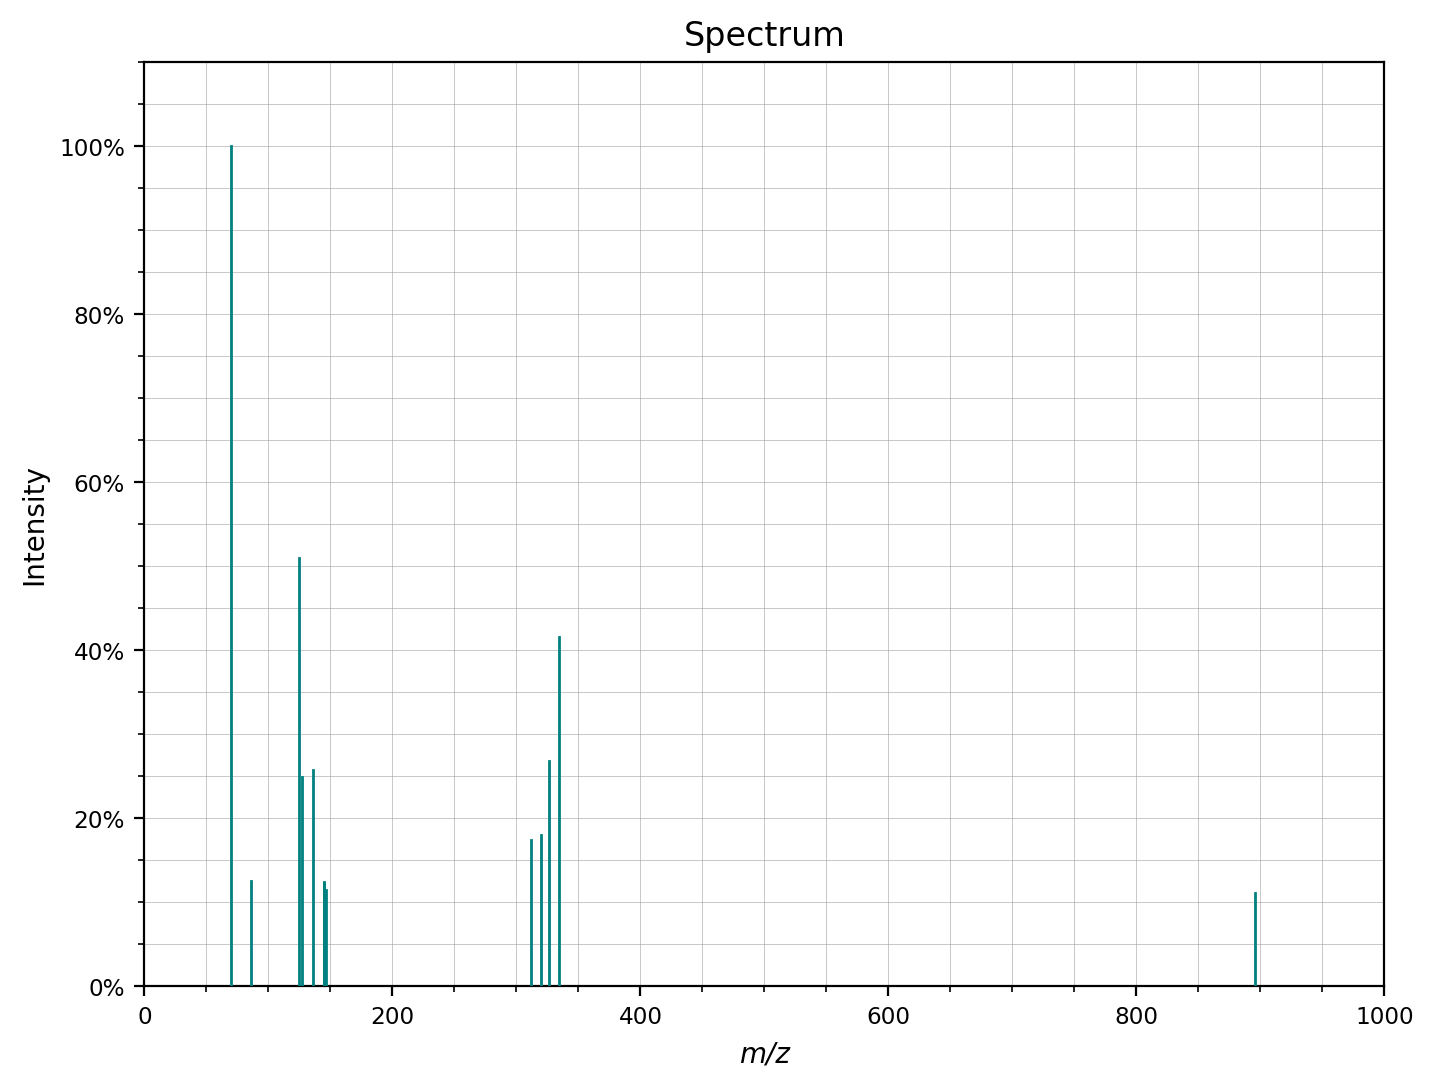

In [37]:
i = 23
print(motif_spectra[i].peaks.mz)
print("TOP 3 frags: ", heapq.nlargest(3, list(zip(motif_spectra[i].peaks.mz, motif_spectra[i].peaks.intensities)), key = lambda x: x[1]))
print("TOP 3 losses: ", heapq.nlargest(3, list(zip(motif_spectra[i].losses.mz, motif_spectra[i].losses.intensities)), key = lambda x: x[1]))
motif_spectra[i].plot()

In [28]:
#smiles_per_motifs, predicted_motifs, predicted_motifs_distribution, spectra_per_motifs = predict_with_lda(lda_model, spectra_path, id2word)

### Motif analysis

In [20]:
from Spec2Vec_annotation import load_model_and_data
from Spec2Vec_annotation import calc_similarity
from Spec2Vec_annotation import retrieve_top_hits

In [21]:
s2v_model, embeddings_smiles_DB = load_model_and_data()

In [22]:
smiles = embeddings_smiles_DB.smiles.to_numpy()
embeddings_DB = embeddings_smiles_DB.embeddings.to_list()
spectra_DB = embeddings_smiles_DB.spectra.to_list()

In [23]:
s2v_scores = calc_similarity(s2v_model, motif_spectra, embeddings_DB)

In [38]:
top_scores, top_smiles, top_spectra = retrieve_top_hits(s2v_scores, 23, smiles, spectra_DB)

In [39]:
top_scores

(0.5773035340672309,
 0.5620364667892666,
 0.5544394476876221,
 0.5433356193849874,
 0.5390377406356135,
 0.5239076486471104,
 0.5068356719646259,
 0.5015759870981392,
 0.49478131332857844,
 0.4934839463593273)

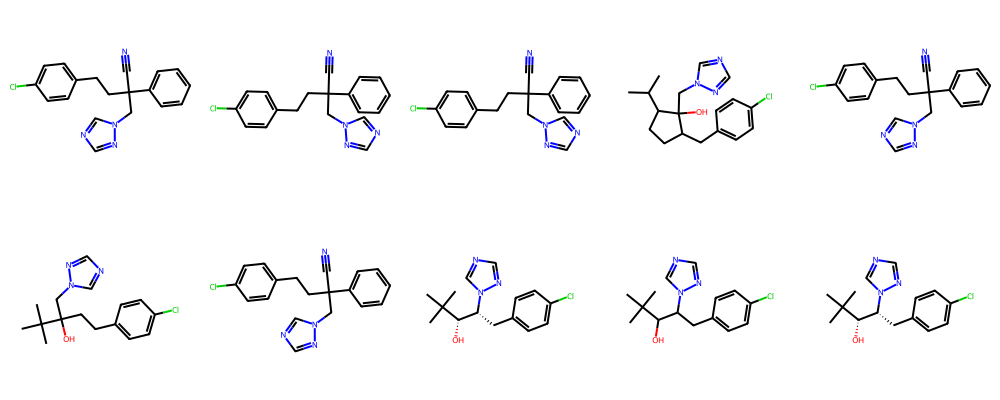

In [40]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in top_smiles], molsPerRow=5)

23 looks good. top 3 peaks
27 i should check out
40 check out
41 really interesting
44 check out
45 check out
48 interesting not so good
50 interesting
52 similar to 23